                                  ***Classification***

**Classification** is a supervised learning problem where the goal is to predict the class label of new observations based on labeled training data.

In this notebook, we explore classification using the MNIST dataset — a collection of handwritten digits (0 to 9).  
We will:
- Understand the structure of image data
- Preprocess the data
- Train a logistic regression model
- Evaluate performance using accuracy and confusion matrix

In [12]:
### Load and Exlore Data

#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
df = pd.read_csv("MNIST_100.csv")
print(f"Shape of dataset: {df.shape}")
df.head()


Shape of dataset: (9999, 785)


,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 🔍 Visualizing the First Digit

Before we train any model, it's important to understand what our data looks like.

Each row in the dataset represents a single digit image:
- The **first column** contains the label (i.e., which digit it is — from 0 to 9)
- The remaining **784 columns** contain pixel intensity values of a **28x28 grayscale image**, flattened into a single row.

In the plot below, we:
- Extract the first image from the dataset
- Reshape it from a 1D array (784,) back into a 2D array (28x28)
- Display it using `matplotlib.pyplot.imshow()`

This helps verify that:
- The pixel values form a clear image
- The label (`y[0]`) matches the actual digit



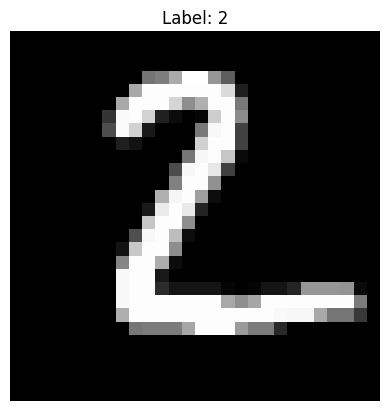

In [13]:
# Separate features and label (label is the first column, named 0)
X = df.iloc[:, 1:]   # All columns except the first one
y = df.iloc[:, 0]    # First column is the label

# Plot the first image
plt.imshow(X.iloc[0].values.reshape(28, 28), cmap='gray')
plt.title(f"Label: {y.iloc[0]}")
plt.axis("off")
plt.show()





### 📉 Visualizing Digits using PCA

Since each image in the dataset has 784 pixel features, it is difficult to visualize this high-dimensional data directly.

To make visualization easier, we apply **Principal Component Analysis (PCA)**, which reduces dimensionality by projecting the data into 2 principal components (2D space).

In the scatter plot below:
- We transform the image data (`X`) using PCA
- We then plot a subset of two digit classes (digit 0 and digit 1) using different colors
- Each point represents a single image, now expressed using only 2 principal components

This helps us understand whether the digit classes can be visually separated — even in 2D.


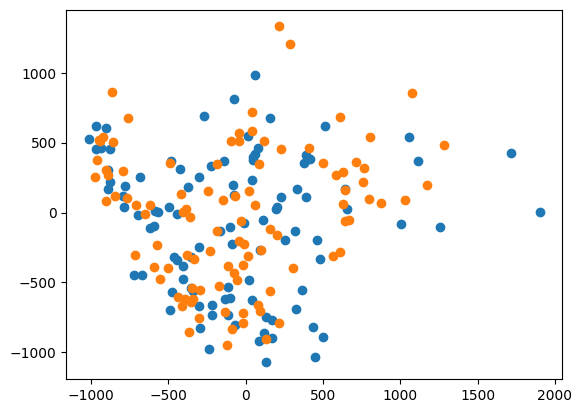

In [14]:
# Visualize data
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
PCAX = pca.transform(X)

plt.scatter(PCAX[0:100, 0], PCAX[0:100, 1]) # Digit 0
plt.scatter(PCAX[100:200, 0], PCAX[100:200, 1]) # Digit 1
plt.show()

### 🏠 Load the Housing Dataset

In this section, we load a dataset containing housing-related features and prices.  
The dataset includes 14 columns and 299 rows. Each row represents a neighborhood, and each column is a feature describing housing conditions or demographics.

Typical features include:
- Crime rate
- Number of rooms
- Tax rate
- Distance to employment centers
- Median home value (target variable)

We'll use this data for regression tasks — predicting housing prices based on the features.


In [15]:
data = pd.read_csv('housing_training.csv')
print(data)

     0.00632    18   2.31  0  0.538  6.575  65.2    4.09  1  296  15.3  \
0    0.02731   0.0   7.07  0  0.469  6.421  78.9  4.9671  2  242  17.8   
1    0.02729   0.0   7.07  0  0.469  7.185  61.1  4.9671  2  242  17.8   
2    0.03237   0.0   2.18  0  0.458  6.998  45.8  6.0622  3  222  18.7   
3    0.06905   0.0   2.18  0  0.458  7.147  54.2  6.0622  3  222  18.7   
4    0.02985   0.0   2.18  0  0.458  6.430  58.7  6.0622  3  222  18.7   
..       ...   ...    ... ..    ...    ...   ...     ... ..  ...   ...   
294  0.12932   0.0  13.92  0  0.437  6.678  31.1  5.9604  4  289  16.0   
295  0.05372   0.0  13.92  0  0.437  6.549  51.0  5.9604  4  289  16.0   
296  0.14103   0.0  13.92  0  0.437  5.790  58.0  6.3200  4  289  16.0   
297  0.06466  70.0   2.24  0  0.400  6.345  20.1  7.8278  5  358  14.8   
298  0.05561  70.0   2.24  0  0.400  7.041  10.0  7.8278  5  358  14.8   

      396.9   4.98    24  
0    396.90   9.14  21.6  
1    392.83   4.03  34.7  
2    394.63   2.94  33.4  
3  

### 📈 Visualizing the First Two Features

To get an idea of how our housing features are distributed, we plot the first two columns of the dataset.

- `data.iloc[:, 0:2]` selects all rows and the first two features (e.g., crime rate and proportion of residential land)
- `plt.plot(x, 'ko')` plots the values as black dots (`'k' = black`, `'o' = dot marker`)

This scatter plot helps us visually inspect:
- How values are distributed across observations
- Whether there's any clustering or outliers
- The spread and range of each variable


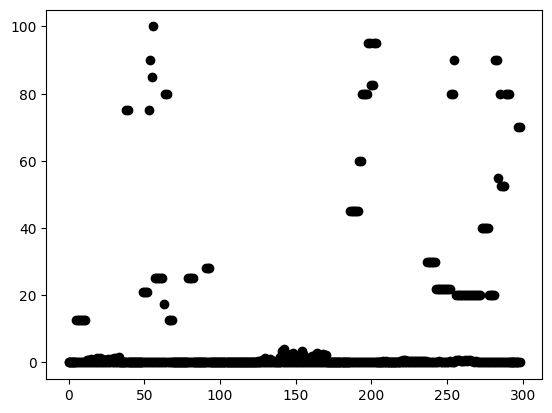

In [16]:
X = data.iloc[:, 0:2]
plt.plot(X, 'ko')
plt.show()